---

<center>

# **Uncertainty Quantification**

<center>

---


## Probability Theory Basics:

---

Before we dig into uncertainty quantification, Monte Carlo method, Bayesian and non-Bayesian approaches we need to **graps the fundamentals** of probability theory.

### <u>Random variables</u>:

Suppose an experiment has an outcome in sample space $\Omega$. A real variable $X$ that is defined for all possible outcomes in $\Omega$ is called a *random variable*.

### <u>Cumulative distribution functions</u>:

A function $f(x)$ that gives the probability $p_i = f(x_i)$ that $x$ is exactly $x_i$ is called the probability function. If the random variable is continuous $p_i = f(x_i) = 0$ because there is an infinite amount of $x_i$'s. In those cases is of interest to know the probability that $x$ is less than some particular value or inside some range of values.

That is the concept of *cumulative distribution functions*

$$F(x) = P(X \leq x)$$

with $P(X \leq x)$ being the probability that $X \leq x$.

this function has the three following properties

$$0 \leq F(x) \leq 1 \hspace{1cm} \lim_{x\to-\infty}F(x)=0 \hspace{1cm} \lim_{x\to\infty}F(x)=1$$

Now, $f(x)$ is usually called the *probability density function (pdf)* of $X$ and is denoted by $\pi(x)$ 

$$\pi(x)=\frac{d F(x)}{dx}$$

so the probability that $X \leq a$ is

$$P(X\leq a)=\int_{-\infty}^a\pi(x)dx$$

and has the following properties

$$\pi(x) \geq 0 \hspace{1cm}and\hspace{1cm} \int_{-\infty}^{+\infty}\pi(x)dx=1$$

### <u>Joint Distribution</u>:

We can easily generalize the idea of cumulative distribution functions to two (or more) dimensions. Suppose we have two random variables $x$ and $y$; now define their *joint probability density function* $f(x,y)$ so that $f(x_i, y_j)dxdy$ is the probability that the point $(x, y)$ is in an element of area $dxdy$ at $x=x_i$, $y=y_j$.

Then the probability that the point is in a given region of the $(x,y)$ plane, is the integral fo $f(x,y)$ over that area, that is

$$P(X\leq a,Y\leq b)=\int_{-\infty}^a\int_{-\infty}^b\pi(x,y)dxdy$$

### <u>Mean value and Standard deviation</u>:

Suppose, for example, that $x$ represents experimental measurements of the lenght of a rod, and that we have a large number $N$ of measurements $x_i$. We might reasonably take $p_i=f(x_i)$ proportional to the number of times $N_i$ we obtained $x_i$, that is $p_i=\frac{N_i}{N}$. In this type of situation we are interested in two numbers, the mean or average value of all our measurements, and some value that indicates how widely the original set of values spreads out about that average

The expected value, or **mean** of $X$

$$\mathbb{E}[X]=\int_{-\infty}^{+\infty}x\pi(x)dx$$

The **variance**

$$Var[X]=\sigma_X^2=\int_{-\infty}^{+\infty}\left(x-\mathbb{E}[X]\right)^2\pi(x)dx$$

with $\sigma_X$ being the **standard deviation** of $X$

### <u>Conditional Probability</u>:

The probability that event $A$ ocurrs given the occurrence of another event $B$ is $P(A|B)$. Notice that for this to make sense, $A$ and $B$ must be related, if that wasn't the case $P(A|B)=P(A)$.

Then the mean value $X$ given that $Y=y$ is 

$$\mathbb{E}[X|y]=\int_{-\infty}^{+\infty}x\pi(x|y)dx$$

then, the variance

$$Var[X|y]=\sigma_{x|y}^2=\int_{-\infty}^{+\infty}\left(x-\mathbb{E}[X|y]\right)^2\pi(x|y)dx$$

### <u>Bayes' Theorem </u>:

This theorem describes how to update the probability of an event based on new evidence (e.g new experimental data). Basically speaking it relates the probability of $A$ given $B$ to the probability of $B$ given $A$

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

where 

* **$P(A|B){:}$ Posterior probability**- the probability of $A$ after observing $B.$
* **$P(B|A){:}$ Likelihood**- the probability of observing $B$ given that $A$ is true
* **$P(A){:}$ Prior probability**- the initial probability of $A$ before observing $B.$ 
* **$P(B){:}$ Marginal probability of $B$**, which acts as a normalizing constant

#### Quick example:

Imagine you're monitoring structural beams for cracks, an early estimatation told you that there is a $5%$ probability that the beam develops cracks over time. But you want to do a more precise study about it, for that purpose you know that stiffness decreases with cracks, altering the natural frecuency of the beam, so a vibration test will tell you if the beam has a crack or not.

The vibration sensor has an accuracy of $90%$, that is $P(abnormal|crack)=0.9$, then $P(abnormal|no crack)=0.1$.

We use Bayes' theorem to update our belief for $P(abnormal)$

$$P(\text{crack|abnormal})=\frac{P(\text{abnormal|crack})\cdot P(\mathrm{crack})}{P(\mathrm{abnormal})}$$

Since an abnormal result can be given by the sensor with or without a crack, we calculate it

$$P(\mathrm{abnormal})=P(\mathrm{abnormal}|\mathrm{crack})\cdot P(\mathrm{crack})+P(\mathrm{abnormal}|\mathrm{no~crack})\cdot P(\mathrm{no~crack})=0.14$$

then, applying Bayes' theorem 

$$P(\mathrm{crack}|\mathrm{abnormal})=\frac{0.90\cdot0.05}{0.14}=\frac{0.045}{0.14}\approx0.321$$

### <u>Monte Carlo Method</u>:

In the process of building and solving our stochastic model we end up with  means, and standard deviations expressed as integrals over probability distributions. These integrals most of the time are impossible to solve analitycally. Monte Carlo method approximates them through random sampling.

Suppose that the response of our stochastic model is $y=g(\theta)$ depends on the uncertain parameter $\theta$ with a probability density function $\pi(\theta)$, the big picture of how the method is applied to get quantities like the mean is

1. Sample Parameters: generate $N$ random samples $\theta_1,\theta_2,...,\theta_N$ from the distribution $\pi(\theta)$
2. Evaluate the function: compute the responses for each sample $y_i=g(\theta_i)$
3. Approximate the integral: use the sample average to estimate the expectation

$$E[y]\approx\frac{1}{N}\sum_{i=1}^Ny_i$$

4. Extend the same concept to the other relevant quantities

### <u>Histogram</u>:

An histogram is a commonly used type of graph to visualize the sampling of a random variable, for example we will use Python to generate an histogram for the random variable $X \sim N(0,0.1)$

NOTE:

**The normal distribution** (*Gaussian*) has a pdf

$$\pi(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

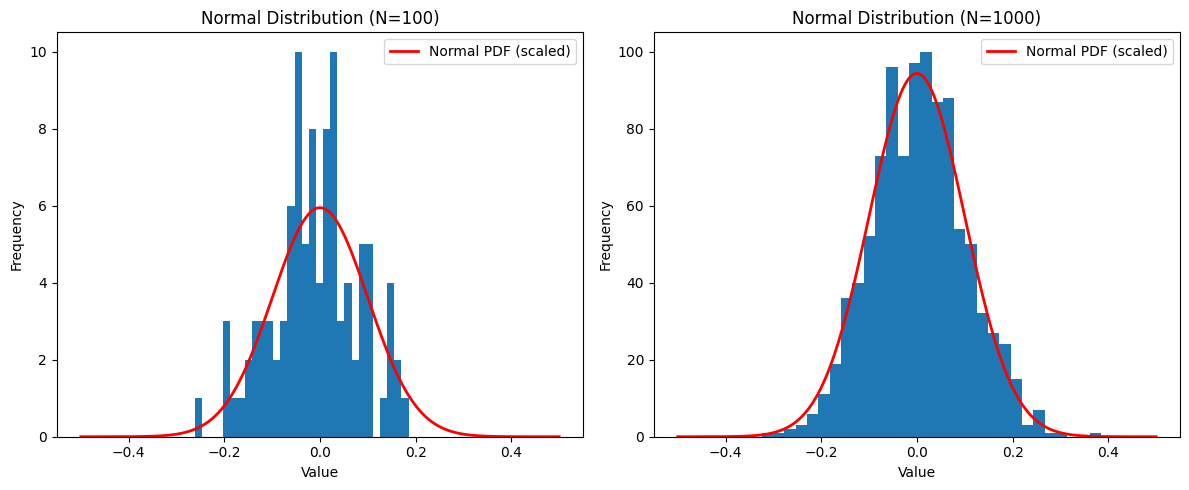

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
mu, sigma = 0, 0.1
x = np.linspace(-0.5, 0.5, 1001)
data_1 = np.random.normal(mu, sigma, 100)
data_2 = np.random.normal(mu, sigma, 1000)

# Create figure
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

# First plot (N=100)
# Calculate bin width (for 30 bins)
hist_1, bins_1 = np.histogram(data_1, bins=30)
bin_width_1 = bins_1[1] - bins_1[0]
# Scale the normal PDF
normal_analytical_1 = (1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-((x-mu)**2/(2*(sigma**2))))
scaled_normal_1 = normal_analytical_1 * (len(data_1) * bin_width_1)

axis[0].hist(data_1, 30)
axis[0].plot(x, scaled_normal_1, 'r-', linewidth=2, label='Normal PDF (scaled)')
axis[0].set_title('Normal Distribution (N=100)')
axis[0].set_xlabel('Value')
axis[0].set_ylabel('Frequency')
axis[0].legend()

# Second plot (N=1000)
# Calculate bin width (for 30 bins)
hist_2, bins_2 = np.histogram(data_2, bins=30)
bin_width_2 = bins_2[1] - bins_2[0]
# Scale the normal PDF
normal_analytical_2 = (1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-((x-mu)**2/(2*(sigma**2))))
scaled_normal_2 = normal_analytical_2 * (len(data_2) * bin_width_2)

axis[1].hist(data_2, 30)
axis[1].plot(x, scaled_normal_2, 'r-', linewidth=2, label='Normal PDF (scaled)')
axis[1].set_title('Normal Distribution (N=1000)')
axis[1].set_xlabel('Value')
axis[1].set_ylabel('Frequency')
axis[1].legend()

plt.savefig('diagrams/02_normal_histogram.svg')
plt.tight_layout()
plt.show()

